# Import libraries


In [186]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Data Collection & Processing

In [188]:
train_df = pd.read_csv('train.csv')

In [189]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [190]:
train_df.shape

(891, 12)

In [191]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [192]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Handling Missing value**

In [194]:
train_df= train_df.drop(columns= 'Cabin' , axis=1)

In [195]:
train_df.fillna({'Age': train_df['Age'].mean()}, inplace=True)

In [196]:
train_df['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [197]:
train_df.fillna({'Embarked': train_df['Embarked'].mode()[0]}, inplace=True)

In [198]:
train_df['Age'] = train_df['Age'].astype(int)

# Data Analysis

In [200]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.544332,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.013778,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [201]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    int32  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(1), int32(1), int64(5), object(4)
memory usage: 73.2+ KB


In [202]:
train_df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

# Data visualization

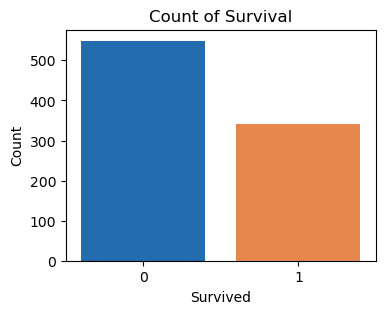

In [204]:
survival_counts = {'Survived': [0, 1], 'Count': [549, 342]}
df = pd.DataFrame(survival_counts)

custom_colors = ['#0c6ec4','#ff8234']

plt.figure(figsize=(4, 3))  # Width, height in inches
sns.barplot(x='Survived', y='Count', hue='Survived', data=df, palette=custom_colors, dodge=False)
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Count of Survival')
plt.legend([],[], frameon=False)
plt.show()

In [205]:
train_df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

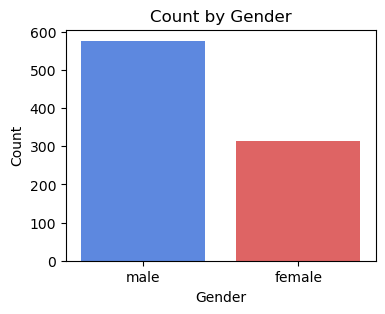

In [206]:
sex_counts = {'Sex': ['male', 'female'], 'Count': [577, 314]}
df = pd.DataFrame(sex_counts)

custom_colors = ['#4781f5', '#f25050']

plt.figure(figsize=(4, 3))  
sns.barplot(x='Sex', y='Count', hue='Sex', data=df, palette=custom_colors, dodge=False)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Count by Gender')
plt.legend([],[], frameon=False)  # Hide legend
plt.show()

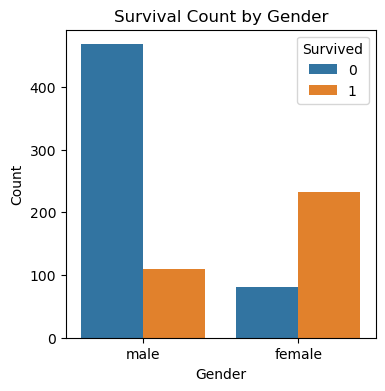

In [207]:
plt.figure(figsize=(4, 4)) 
sns.countplot(x='Sex', hue='Survived', data=train_df)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Survival Count by Gender')
plt.show()

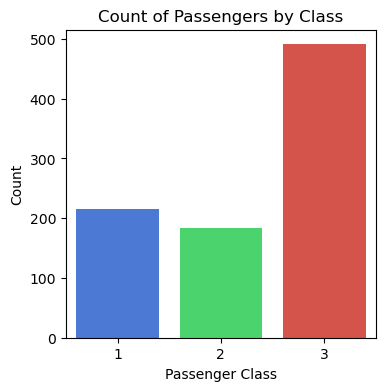

In [208]:
plt.figure(figsize=(4, 4)) 
custom_colors = ['#3471eb', '#34eb61', '#eb4034']
sns.countplot(x='Pclass', hue='Pclass', data=train_df, palette=custom_colors)
plt.legend([], [], frameon=False)
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.title('Count of Passengers by Class')
plt.show()

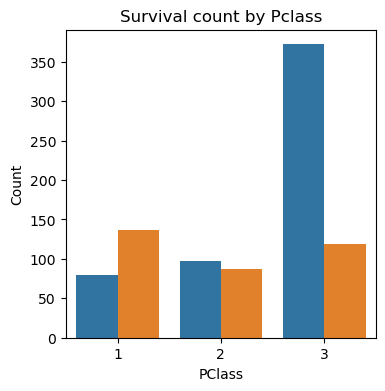

In [209]:
plt.figure(figsize=(4, 4)) 
sns.countplot(x='Pclass', hue='Survived', data=train_df)
plt.legend([], [], frameon=False)
plt.xlabel('PClass')
plt.ylabel('Count')
plt.title('Survival count by Pclass')
plt.show()

**Encoding the Categorical Columns**

In [211]:
# Count Gender

train_df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [212]:
train_df['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [213]:
pd.set_option('future.no_silent_downcasting', True)
train_df.replace({'Sex': {'male': 0, 'female': 1}, 'Embarked': {'S': 0, 'C': 1, 'Q': 2}}, inplace=True)

In [214]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,0


**Separating features & Target**

In [216]:
X = train_df.drop(columns =['PassengerId','Survived', 'Name' , 'Ticket'], axis=1)

In [217]:
Y = train_df['Survived']

In [218]:
print(X.head())

   Pclass Sex  Age  SibSp  Parch     Fare Embarked
0       3   0   22      1      0   7.2500        0
1       1   1   38      1      0  71.2833        1
2       3   1   26      0      0   7.9250        0
3       1   1   35      1      0  53.1000        0
4       3   0   35      0      0   8.0500        0


In [219]:
print(Y.head())

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


**Splitting the data into training data & Test data**

In [221]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y , test_size=0.2 , random_state=2)

In [222]:
print(X.shape , X_train.shape , X_test.shape, Y_train.shape , Y_test.shape)

(891, 7) (712, 7) (179, 7) (712,) (179,)


**Model Training**

In [224]:
model = LogisticRegression(solver='liblinear')

In [225]:
model.fit(X_train , Y_train)

LogisticRegression(solver='liblinear')

**Model Evaluation**

In [227]:
X_prediction = model.predict(X_train)

In [228]:
X_prediction

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,

In [229]:
train_data_acc = accuracy_score(Y_train , X_prediction)

In [230]:
print('Accuracy score of train data :' ,train_data_acc)

Accuracy score of train data : 0.8146067415730337


In [231]:
X_test_prediction = model.predict(X_test)

In [232]:
X_test_prediction

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0], dtype=int64)

In [233]:
test_data_acc = accuracy_score(Y_test , X_test_prediction)

In [234]:
print('Accuracy score of test data :' , test_data_acc)

Accuracy score of test data : 0.7821229050279329
